In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['train.csv', 'gender_submission.csv', 'test.csv']


In [2]:
dftrain_raw = pd.read_csv('../input/train.csv')
dftest_raw = pd.read_csv('../input/test.csv')

Text(0.5, 0, 'Survived')

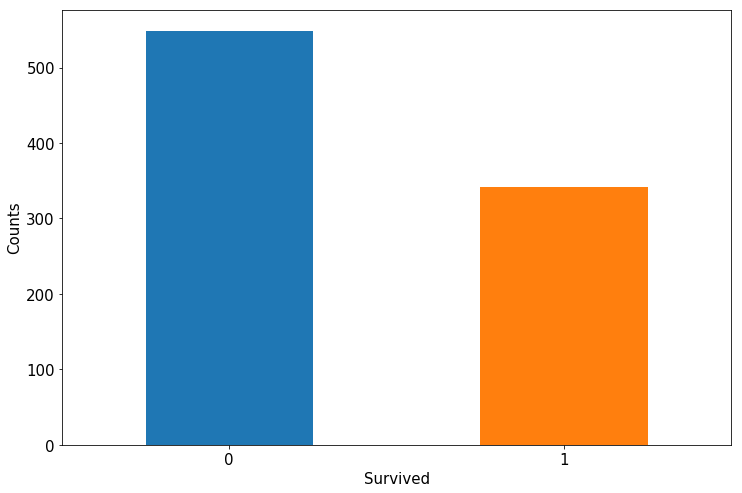

In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'
ax = dftrain_raw['Survived'].value_counts().plot(kind = 'bar',
     figsize = (12,8),fontsize=15,rot = 0)
ax.set_ylabel('Counts',fontsize = 15)
ax.set_xlabel('Survived',fontsize = 15)

Text(0.5, 0, 'Age')

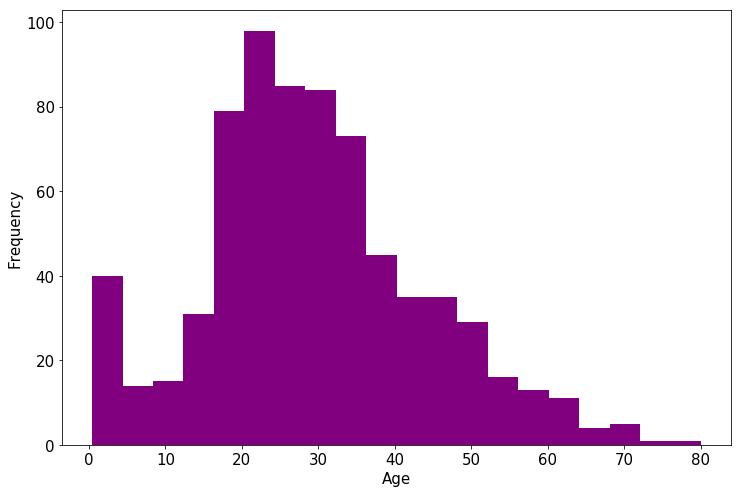

In [4]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'
ax = dftrain_raw['Age'].plot(kind = 'hist',bins = 20,color= 'purple',
                    figsize = (12,8),fontsize=15)

ax.set_ylabel('Frequency',fontsize = 15)
ax.set_xlabel('Age',fontsize = 15)

Text(0.5, 0, 'Age')

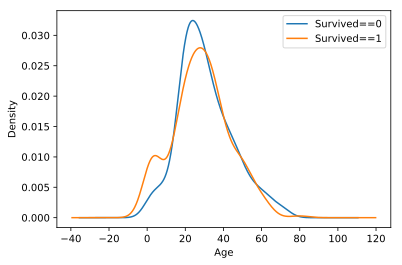

In [5]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
ax = dftrain_raw.query('Survived == 0')['Age'].plot(kind = 'density',
                      fontsize=10)
dftrain_raw.query('Survived == 1')['Age'].plot(kind = 'density',
                      fontsize=10)
ax.legend(['Survived==0','Survived==1'],fontsize = 10)
ax.set_ylabel('Density',fontsize = 10)
ax.set_xlabel('Age',fontsize = 10)

In [6]:
def preprocessing(dfdata):

    dfresult= pd.DataFrame()
    dfPclass = pd.get_dummies(dfdata['Pclass'])
    dfPclass.columns = ['Pclass_' +str(x) for x in dfPclass.columns ]
    dfresult = pd.concat([dfresult,dfPclass],axis = 1)
    dfSex = pd.get_dummies(dfdata['Sex'])
    dfresult = pd.concat([dfresult,dfSex],axis = 1)
    dfresult['Age'] = dfdata['Age'].fillna(dfdata['Age'].mean())
    dfresult['Age_null'] = pd.isna(dfdata['Age']).astype('int32')
    dfresult['SibSp'] = dfdata['SibSp']
    dfresult['Parch'] = dfdata['Parch']
    dfresult['Fare'] = dfdata['Fare']
    dfresult['Cabin_null'] =  pd.isna(dfdata['Cabin']).astype('int32')
    dfEmbarked = pd.get_dummies(dfdata['Embarked'],dummy_na=True)
    dfEmbarked.columns = ['Embarked_' + str(x) for x in dfEmbarked.columns]
    dfresult = pd.concat([dfresult,dfEmbarked],axis = 1) 
    return(dfresult)

In [7]:
x_train = preprocessing(dftrain_raw)
y_train = dftrain_raw['Survived'].values

x_test = preprocessing(dftest_raw)
print('x_train.shape:',x_train.shape)
print('x_test.shape:',x_test.shape)

x_train.shape: (891, 15)
x_test.shape: (418, 15)


In [8]:
from keras import models,layers
from keras import backend as K
K.clear_session()
model = models.Sequential()
model.add(layers.Dense(64,activation = 'relu',input_shape=(15,)))
model.add(layers.Dense(64,activation = 'relu' ))
model.add(layers.Dense(64,activation = 'relu' ))
model.add(layers.Dense(64,activation = 'relu' ))
model.add(layers.Dense(1,activation = 'sigmoid' ))
model.compile(optimizer='adam',
            loss='binary_crossentropy',
            metrics=['accuracy'])

Using TensorFlow backend.


In [9]:
history = model.fit(x_train,y_train,
                    batch_size= 64,
                    epochs= 150,
                    validation_split=0.2 
                   )
dfhistory = pd.DataFrame(history.history)
dfhistory.index = range(1,len(dfhistory) + 1)
dfhistory.index.name = 'epoch'
dfhistory 

Train on 712 samples, validate on 179 samples
Epoch 1/150
712/712 [==============================] - 1s 1ms/step - loss: 0.7142 - acc: 0.6292 - val_loss: 0.5516 - val_acc: 0.7263
Epoch 2/150
712/712 [==============================] - 0s 33us/step - loss: 0.6481 - acc: 0.6770 - val_loss: 0.5357 - val_acc: 0.7095
Epoch 3/150
712/712 [==============================] - 0s 34us/step - loss: 0.6779 - acc: 0.6404 - val_loss: 0.5725 - val_acc: 0.6704
Epoch 4/150
712/712 [==============================] - 0s 33us/step - loss: 0.6249 - acc: 0.6531 - val_loss: 0.5168 - val_acc: 0.7318
Epoch 5/150
712/712 [==============================] - 0s 33us/step - loss: 0.5949 - acc: 0.6784 - val_loss: 0.5020 - val_acc: 0.7542
Epoch 6/150
712/712 [==============================] - 0s 33us/step - loss: 0.5912 - acc: 0.6868 - val_loss: 0.5172 - val_acc: 0.7709
Epoch 7/150
712/712 [==============================] - 0s 33us/step - loss: 0.5975 - acc: 0.6952 - val_loss: 0.4721 - val_acc: 0.7542
Epoch 8/150
712/7

,val_loss,val_acc,loss,acc
epoch,,,,
1,0.551569,0.726257,0.714238,0.629213
2,0.535689,0.709497,0.648064,0.676966
3,0.572531,0.670391,0.677949,0.640449
4,0.516820,0.731844,0.624919,0.653090
5,0.502011,0.754190,0.594877,0.678371
6,0.517225,0.770950,0.591244,0.686798
7,0.472097,0.754190,0.597476,0.695225
8,0.517047,0.709497,0.574741,0.716292
9,0.526693,0.782123,0.566977,0.719101


In [10]:
history = model.fit(x_train,y_train,
                    batch_size= 64,
                    epochs= 150,
                    validation_data =(x_train,y_train) 
                   )

Train on 891 samples, validate on 891 samples
Epoch 1/150
891/891 [==============================] - 0s 42us/step - loss: 0.4023 - acc: 0.8238 - val_loss: 0.3835 - val_acc: 0.8260
Epoch 2/150
891/891 [==============================] - 0s 39us/step - loss: 0.3842 - acc: 0.8294 - val_loss: 0.3744 - val_acc: 0.8339
Epoch 3/150
891/891 [==============================] - 0s 39us/step - loss: 0.3771 - acc: 0.8272 - val_loss: 0.3730 - val_acc: 0.8305
Epoch 4/150
891/891 [==============================] - 0s 39us/step - loss: 0.3874 - acc: 0.8215 - val_loss: 0.3688 - val_acc: 0.8406
Epoch 5/150
891/891 [==============================] - 0s 38us/step - loss: 0.4016 - acc: 0.8137 - val_loss: 0.3799 - val_acc: 0.8384
Epoch 6/150
891/891 [==============================] - 0s 39us/step - loss: 0.3787 - acc: 0.8361 - val_loss: 0.3951 - val_acc: 0.8148
Epoch 7/150
891/891 [==============================] - 0s 40us/step - loss: 0.3745 - acc: 0.8260 - val_loss: 0.3632 - val_acc: 0.8373
Epoch 8/150
891/

In [11]:
dfhistory = pd.DataFrame(history.history)
dfhistory.index = range(1,len(dfhistory) + 1)
dfhistory.index.name = 'epoch'

In [12]:
model.predict(x_test[0:5])
model.predict_classes(x_train[0:5])

array([[0],
       [1],
       [0],
       [1],
       [0]], dtype=int32)

In [13]:
y_test_pred = model.predict_classes(x_test)
y_test_pred

/opt/conda/lib/python3.6/site-packages/keras/engine/sequential.py:271: RuntimeWarning: invalid value encountered in greater
  return (proba > 0.5).astype('int32')


array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
    

In [14]:
dfresult = pd.DataFrame()
dfresult['PassengerId'] = dftest_raw['PassengerId']
dfresult['Survived'] = y_test_pred

dfresult.head(10)
dfresult.index = range(1,len(dfresult) + 1)

dfresult.to_csv('submission.csv',index = False)
dfresult

,PassengerId,Survived
1,892,0
2,893,0
3,894,0
4,895,0
5,896,0
6,897,0
7,898,0
8,899,0
9,900,0
10,901,0


In [15]:
from sklearn.metrics import accuracy_score
correct = pd.read_csv('../input/gender_submission.csv')
correct = correct['Survived']
accuracy = accuracy_score(correct, y_test_pred)
accuracy

0.8157894736842105